<a href="https://colab.research.google.com/github/purva98/DeepPixel/blob/current/FER_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install tensorflow==1.14.0

In [4]:
# mount the drive
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [5]:
cd /content/gdrive/My Drive/fer/

/content/gdrive/My Drive/fer


In [2]:
# Import libraries the neccesary libraries
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

from keras.utils import np_utils

from keras import backend as K
from keras.layers import LSTM
from keras.layers import TimeDistributed

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
print(tf.__version__)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

1.14.0


In [8]:
!unzip fer201333.zip

Archive:  fer201333.zip
replace fer2013.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fer2013.csv             


In [0]:
# Providing the input path of the csv file
input_path = 'fer2013.csv'

In [0]:
# labelling the data
labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
num_class = 7
Y = []
X = []
first = True
for line in open(input_path):
   if first:
       first = False
   else:
        row = line.split(',')
        Y.append(int(row[0]))
        X.append([int(p) for p in row[1].split()])
X, Y = np.array(X) / 255.0, np.array(Y)
N, D = X.shape
X = X.reshape(N, 48, 48, 1)
# Diving the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [3]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(48,48,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(128, (3, 3), padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(256, (3, 3), padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(512, (3, 3), padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Dense(256))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Dense(7))
model.add(keras.layers.Activation('softmax'))








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
model.summary()


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [0]:
epochs = 30
batch_size = 512

callbacks = [
    EarlyStopping(patience=3, verbose=1),
    ReduceLROnPlateau(patience=3, verbose=1)
]


In [0]:
history = model.fit(X_train, y_train, 
                    batch_size=batch_size, epochs=epochs, callbacks=callbacks,
                    validation_data=(X_test, y_test),
                    verbose=1)

Train on 32298 samples, validate on 3589 samples
Epoch 1/30
32298/32298 [==============================] - 815s 25ms/step - loss: 0.3970 - acc: 0.8518 - val_loss: 0.4031 - val_acc: 0.8450
Epoch 2/30
32298/32298 [==============================] - 810s 25ms/step - loss: 0.3440 - acc: 0.8678 - val_loss: 0.3660 - val_acc: 0.8565
Epoch 3/30
32298/32298 [==============================] - 823s 25ms/step - loss: 0.3146 - acc: 0.8758 - val_loss: 0.4117 - val_acc: 0.8446
Epoch 4/30
32298/32298 [==============================] - 841s 26ms/step - loss: 0.2945 - acc: 0.8818 - val_loss: 0.3195 - val_acc: 0.8760
Epoch 5/30
32298/32298 [==============================] - 867s 27ms/step - loss: 0.2794 - acc: 0.8866 - val_loss: 0.2829 - val_acc: 0.8858
Epoch 6/30
32298/32298 [==============================] - 868s 27ms/step - loss: 0.2682 - acc: 0.8905 - val_loss: 0.2770 - val_acc: 0.8876
Epoch 7/30
32298/32298 [==============================] - 873s 27ms/step - loss: 0.2589 - acc: 0.8943 - val_loss: 0.2

In [0]:
cd /content/

/content


In [0]:
model.save("fer_model.h5")

In [0]:
from keras.models import load_model
model=load_model("/content/gdrive/My Drive/fer/fer_model.h5")

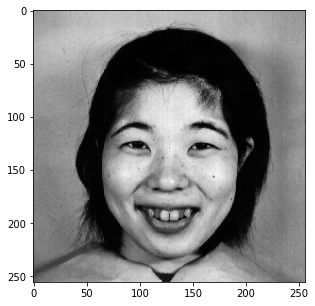

In [56]:
from PIL import Image 
image = Image.open('/content/Happy_7.png')

plt.figure(figsize = (5,5))
plt.imshow(image)

In [57]:
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
face_component=cv2.imread('/content/Happy_7.png')
gray = cv2.cvtColor(face_component, cv2.COLOR_BGR2GRAY)
fc = cv2.resize(gray, (48, 48))
inp = np.reshape(fc,(1,48,48,1)).astype(np.float32)
inp = inp/255.
prediction = model.predict(inp)
em = label_map[np.argmax(prediction)]
score = np.max(prediction)
print(prediction)
print("We guess that this expression is ------->  " + em)

[[3.36811170e-02 2.57426611e-04 1.55290551e-02 7.65998602e-01
  5.79337440e-02 2.08592415e-02 1.05740756e-01]]
We guess that this expression is ------->  Happy


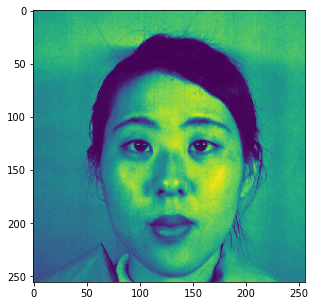

In [58]:
from PIL import Image 
image_2 = Image.open('/content/Neutral_18.png')

plt.figure(figsize = (5,5))
plt.imshow(image_2)

In [59]:
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
face_component=cv2.imread('/content/Neutral_18.png')
gray = cv2.cvtColor(face_component, cv2.COLOR_BGR2GRAY)
fc = cv2.resize(gray, (48, 48))
inp = np.reshape(fc,(1,48,48,1)).astype(np.float32)
inp = inp/255.
prediction = model.predict(inp)
em = label_map[np.argmax(prediction)]
score = np.max(prediction)
print(prediction)
print("We guess that this expression is ------->  " + em)

[[0.07384402 0.00095796 0.0415716  0.07575146 0.30315873 0.07963806
  0.42507815]]
We guess that this expression is ------->  Neutral


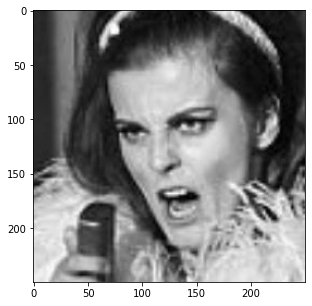

In [75]:
from PIL import Image 
image = Image.open('/content/117.jpg')

plt.figure(figsize = (5,5))
plt.imshow(image)

In [76]:
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
face_component=cv2.imread('/content/117.jpg')
gray = cv2.cvtColor(face_component, cv2.COLOR_BGR2GRAY)
fc = cv2.resize(gray, (48, 48))
inp = np.reshape(fc,(1,48,48,1)).astype(np.float32)
inp = inp/255.
prediction = model.predict(inp)
em = label_map[np.argmax(prediction)]
score = np.max(prediction)
print(prediction)
print("We guess that this expression is ------->  " + em)

[[8.6009669e-01 4.7023722e-04 1.4889680e-02 2.4158346e-02 4.6101440e-02
  6.8778760e-04 5.3595822e-02]]
We guess that this expression is ------->  Anger


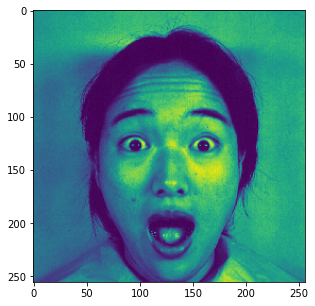

In [67]:
from PIL import Image 
image = Image.open('/content/Surprised_14.png')

plt.figure(figsize = (5,5))
plt.imshow(image)

In [68]:
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
face_component=cv2.imread('/content/Surprised_14.png')
gray = cv2.cvtColor(face_component, cv2.COLOR_BGR2GRAY)
fc = cv2.resize(gray, (48, 48))
inp = np.reshape(fc,(1,48,48,1)).astype(np.float32)
inp = inp/255.
prediction = model.predict(inp)
em = label_map[np.argmax(prediction)]
score = np.max(prediction)
print(prediction)
print("We guess that this expression is ------->  " + em)

[[0.02052552 0.0012337  0.06740131 0.00576819 0.03714984 0.8535307
  0.01439076]]
We guess that this expression is ------->  Surprise
